In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns
sns.set()

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [3]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.datasets import make_blobs

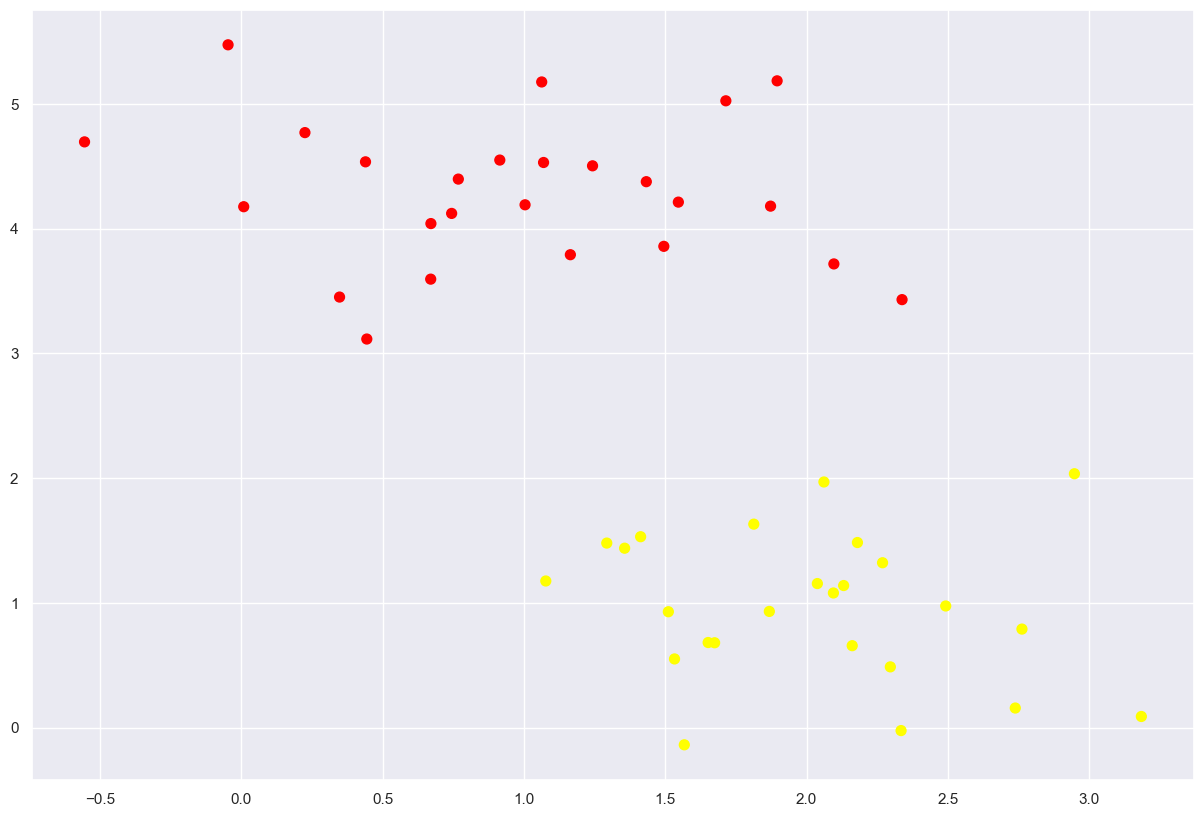

In [5]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

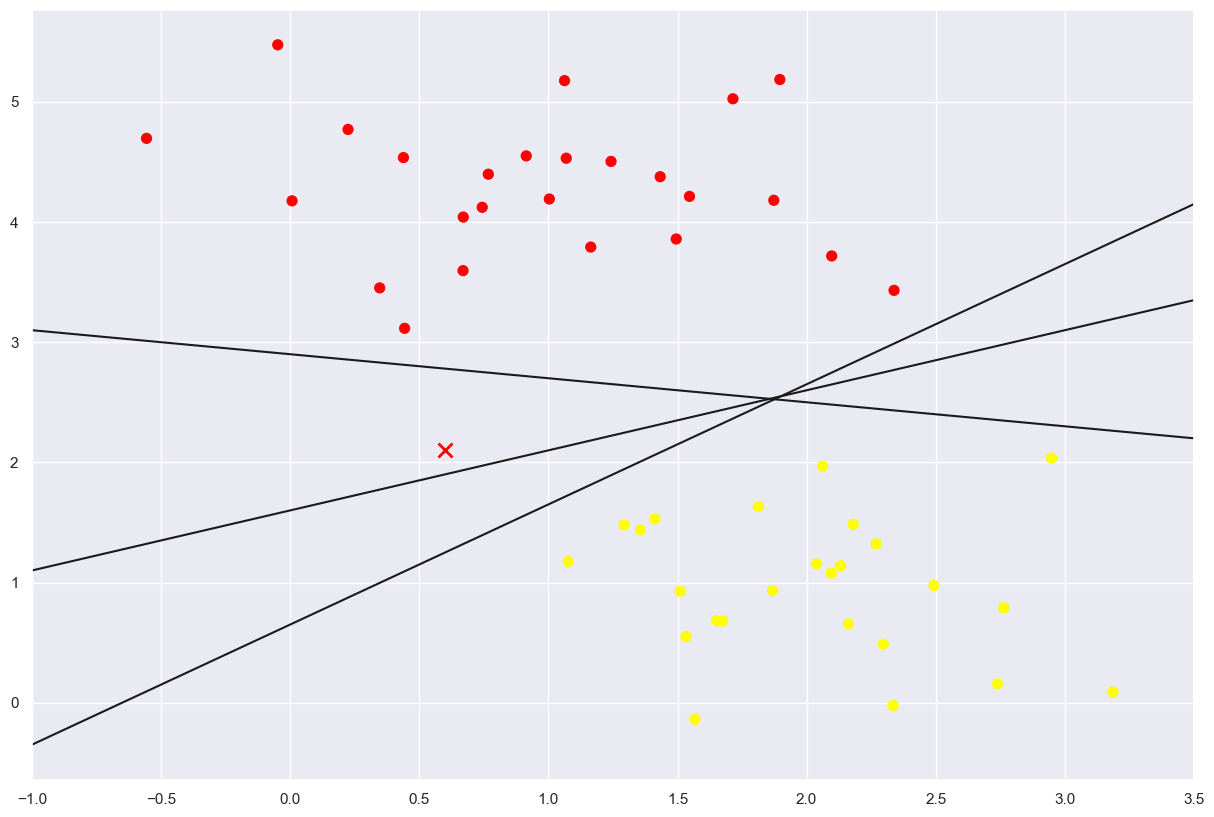

In [6]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

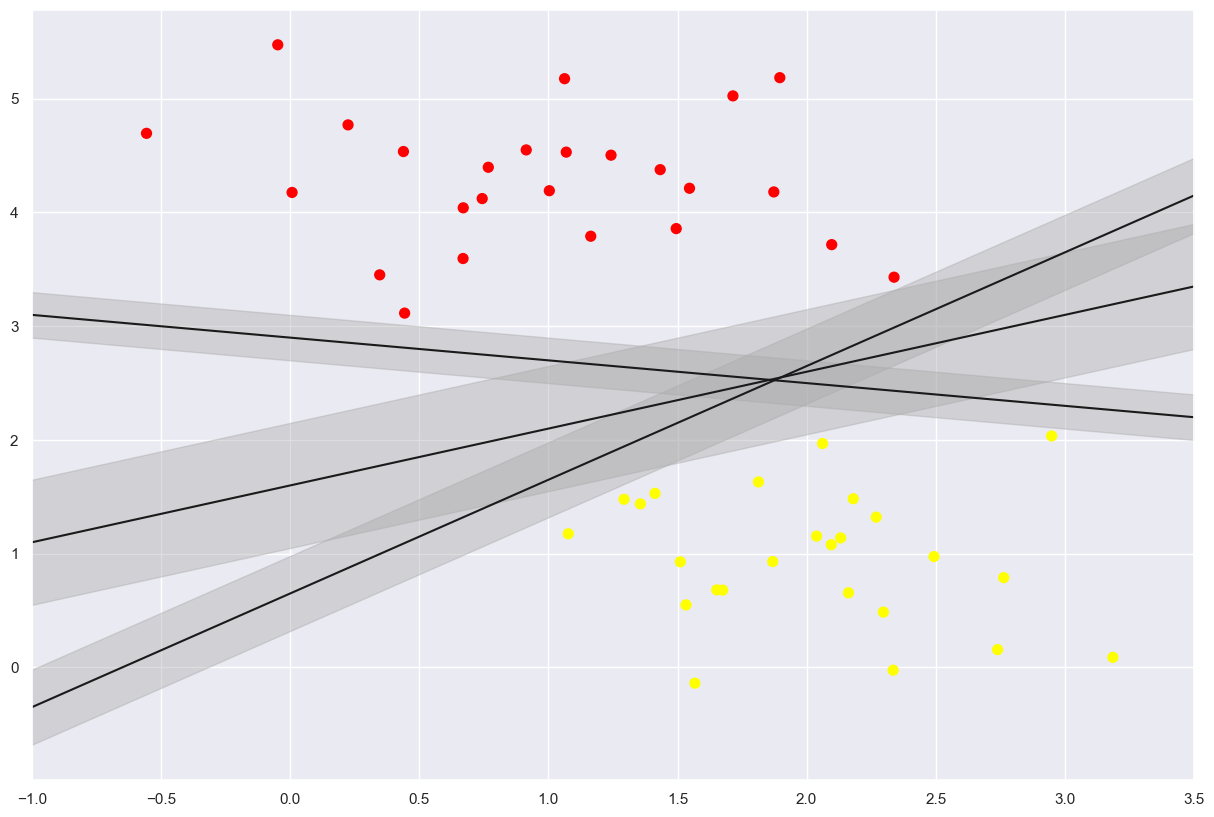

In [7]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [8]:
from sklearn.svm import SVC #Support vector classifier
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [9]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300,marker='o', linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

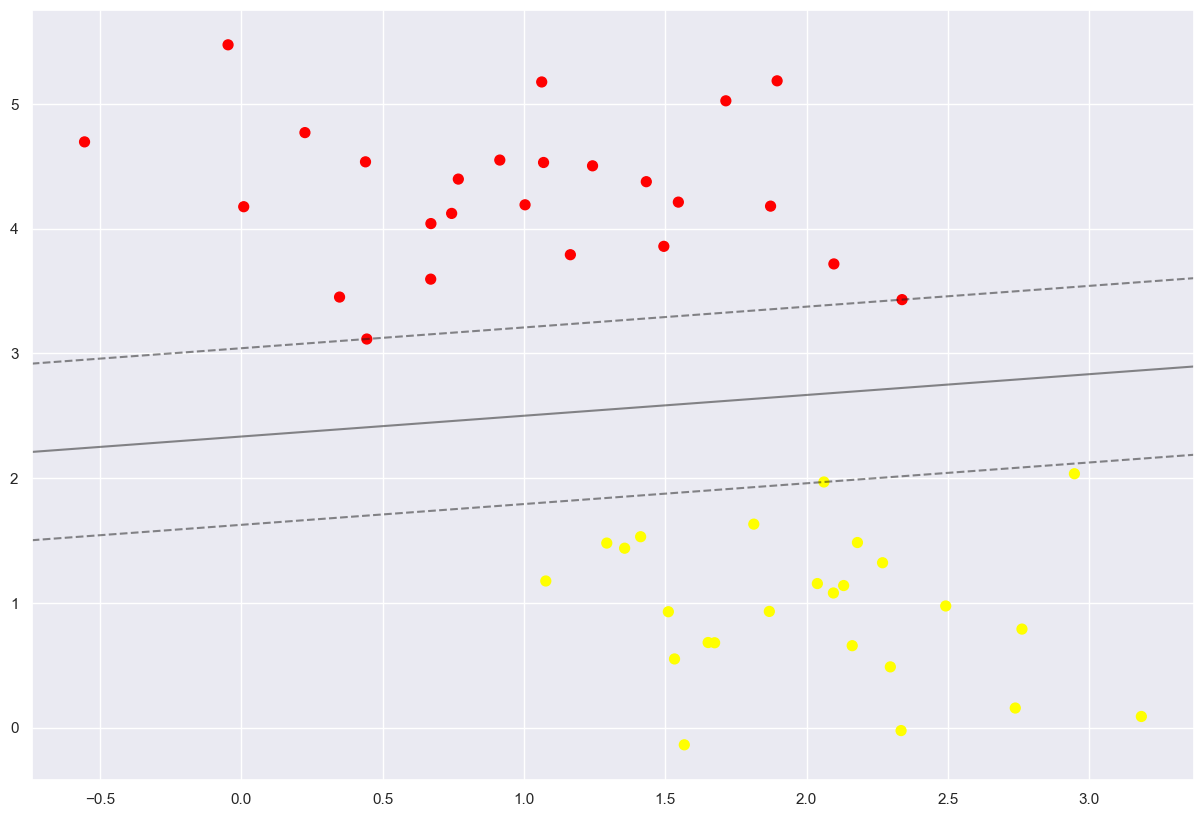

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [11]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

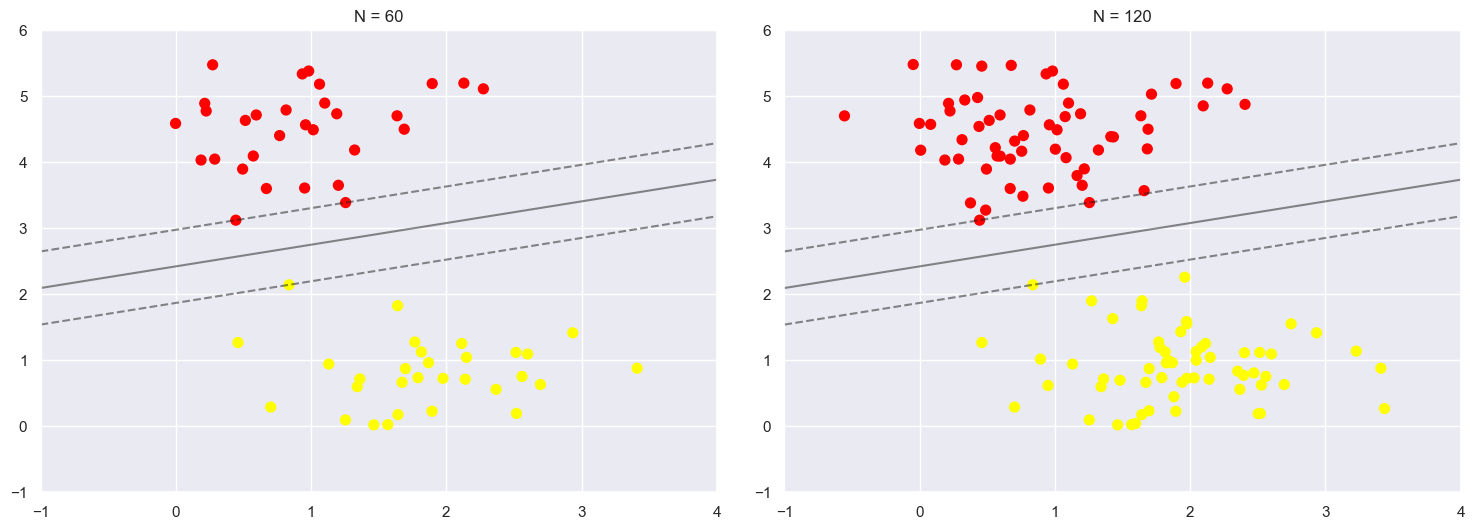

In [12]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50,marker='o', cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [13]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

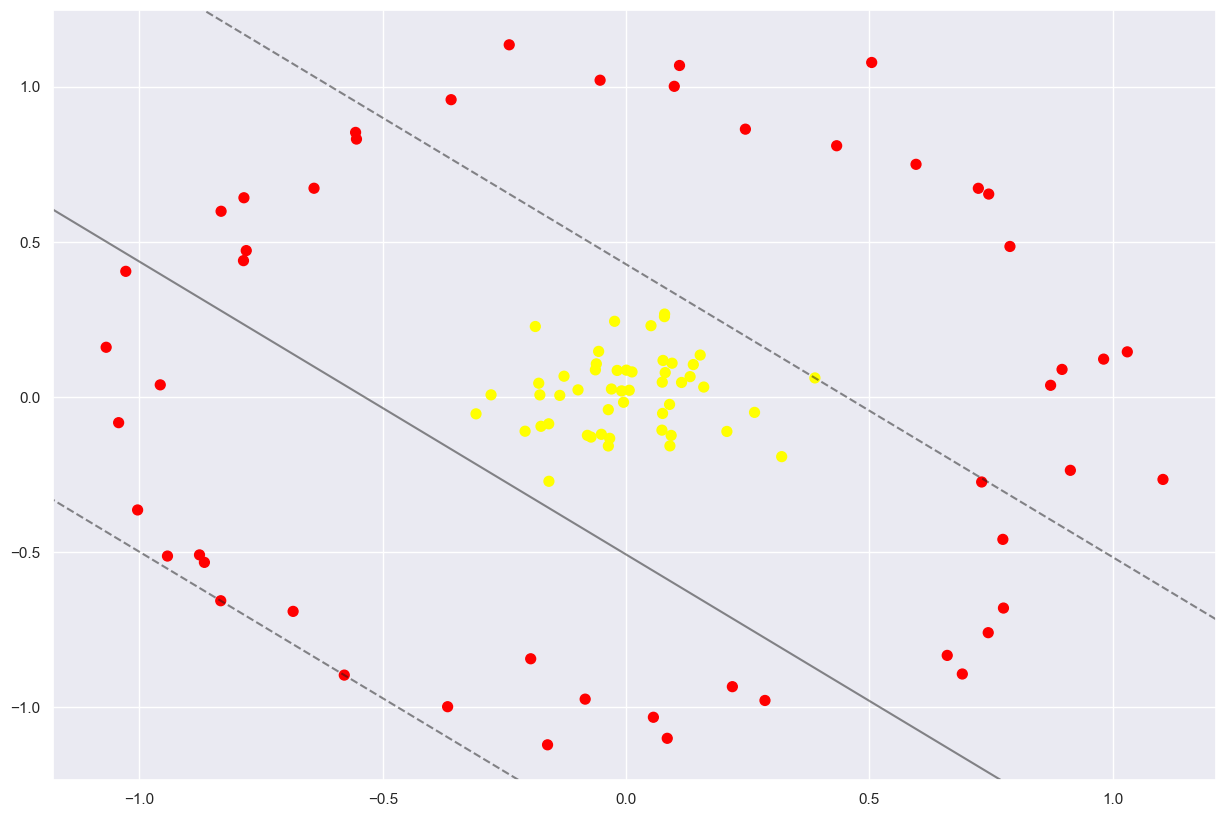

In [14]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

In [15]:
X


array([[-1.02783057e+00,  4.04860287e-01],
       [ 1.13965977e-01,  4.67504601e-02],
       [ 7.23752985e-01,  6.72408599e-01],
       [-2.77411924e-01,  6.87975646e-03],
       [-7.85116433e-01,  6.41949279e-01],
       [-8.32033714e-01,  5.98445694e-01],
       [ 8.72230812e-01,  3.76381499e-02],
       [ 6.90831713e-01, -8.92698176e-01],
       [-3.08279927e-01, -5.43525055e-02],
       [ 7.30575365e-01, -2.73969131e-01],
       [ 2.63932610e-01, -4.96469343e-02],
       [ 8.93600308e-02, -2.40406310e-02],
       [-5.63668098e-02,  1.46961169e-01],
       [ 7.88192694e-02,  2.58922450e-01],
       [ 3.19696795e-01, -1.92260636e-01],
       [-1.77094371e-01,  6.62339761e-03],
       [-1.58915962e-01, -8.64684196e-02],
       [ 2.85379309e-01, -9.77976896e-01],
       [-8.32761827e-01, -6.56665189e-01],
       [ 7.74118794e-01, -4.58861364e-01],
       [ 5.95731535e-01,  7.49699039e-01],
       [-5.55717549e-01,  8.52571028e-01],
       [ 8.45943683e-02, -1.09993383e+00],
       [-7.

In [16]:
1.06909564e-01**2 +  1.09777740e+00**2


1.2165448748254302

In [17]:
(X ** 2).sum(1)


array([1.22034754e+00, 1.51738494e-02, 9.75951707e-01, 7.70047066e-02,
       1.02850669e+00, 1.05041735e+00, 7.62203220e-01, 1.27415849e+00,
       9.79907085e-02, 6.08799448e-01, 7.21252407e-02, 8.56316705e-03,
       2.47748025e-02, 7.32533122e-02, 1.39170193e-01, 3.14062858e-02,
       3.27310704e-02, 1.03788016e+00, 1.12470143e+00, 8.09813658e-01,
       9.16944711e-01, 1.03569935e+00, 1.21701063e+00, 2.16055157e-02,
       1.15047541e+00, 8.42597719e-01, 1.88880925e-02, 7.46597949e-03,
       1.16167264e-02, 1.28235566e+00, 1.85650475e-02, 1.04477276e+00,
       1.54281299e-01, 4.71641439e-04, 3.18796397e-04, 3.41604392e-02,
       2.18974293e-02, 8.10197488e-01, 1.02692927e+00, 8.31410804e-01,
       8.04861482e-01, 5.53687021e-02, 1.15312526e+00, 1.70456405e-02,
       2.39258561e-02, 3.94938371e-02, 8.63468491e-01, 1.16663498e+00,
       6.00171979e-02, 3.29769684e-02, 7.64744615e-03, 1.26273213e-02,
       3.00737785e-03, 9.89313315e-02, 2.62651095e-02, 1.09372190e+00,
      

In [18]:
r = np.exp(-(X ** 2).sum(1))

In [19]:
np.exp(-1.216)

0.2964134525853191

In [20]:
r


array([0.29512758, 0.98494069, 0.37683355, 0.9258855 , 0.35754048,
       0.34979173, 0.46663719, 0.27966621, 0.90665733, 0.54400358,
       0.93041436, 0.99147339, 0.97552957, 0.92936538, 0.87007993,
       0.96908177, 0.96779879, 0.35420474, 0.32474941, 0.44494097,
       0.39973849, 0.35497804, 0.29611404, 0.97862621, 0.31648627,
       0.43059052, 0.98128917, 0.99256182, 0.98845049, 0.27738311,
       0.98160622, 0.35177175, 0.8570309 , 0.99952847, 0.99968125,
       0.96641644, 0.97834058, 0.44477022, 0.35810492, 0.43543454,
       0.44714986, 0.94613624, 0.31564874, 0.98309881, 0.9763581 ,
       0.96127588, 0.42169689, 0.31141309, 0.94174834, 0.96756084,
       0.99238172, 0.98745207, 0.99699714, 0.90580491, 0.97407682,
       0.33496746, 0.94627031, 0.99223372, 0.97385917, 0.33905324,
       0.26041319, 0.3510068 , 0.98328915, 0.41103529, 0.97045749,
       0.37624417, 0.97863856, 0.368793  , 0.99335322, 0.42433089,
       0.38857262, 0.9805716 , 0.39885071, 0.38476038, 0.32339

In [21]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, interactive, fixed, interact_manual

Text(0.5, 0, 'r')

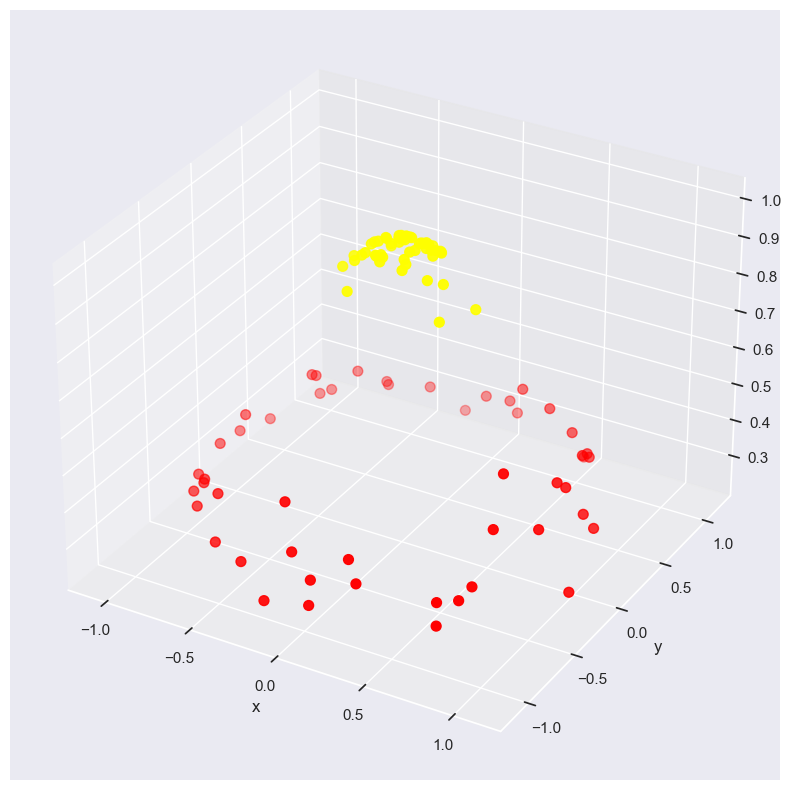

In [22]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

In [23]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

In [24]:
clf.support_vectors_


array([[ 0.73057536, -0.27396913],
       [-0.87636989, -0.50882717],
       [ 0.24515014,  0.86299646],
       [ 0.78867114,  0.48501501],
       [-0.95703249,  0.03905906],
       [-0.78604033,  0.43930868],
       [-0.1959458 , -0.84361511],
       [-0.30827993, -0.05435251],
       [ 0.3196968 , -0.19226064],
       [ 0.38796006,  0.06138639]])

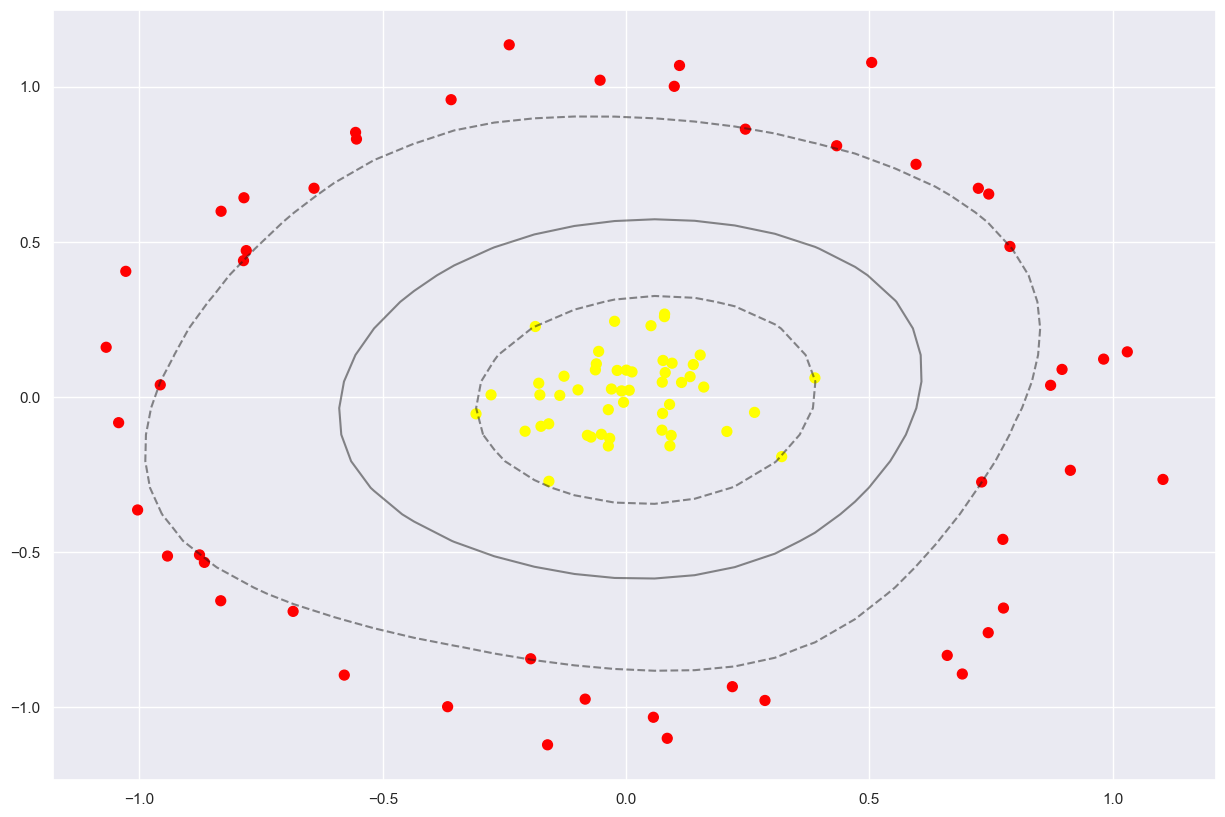

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

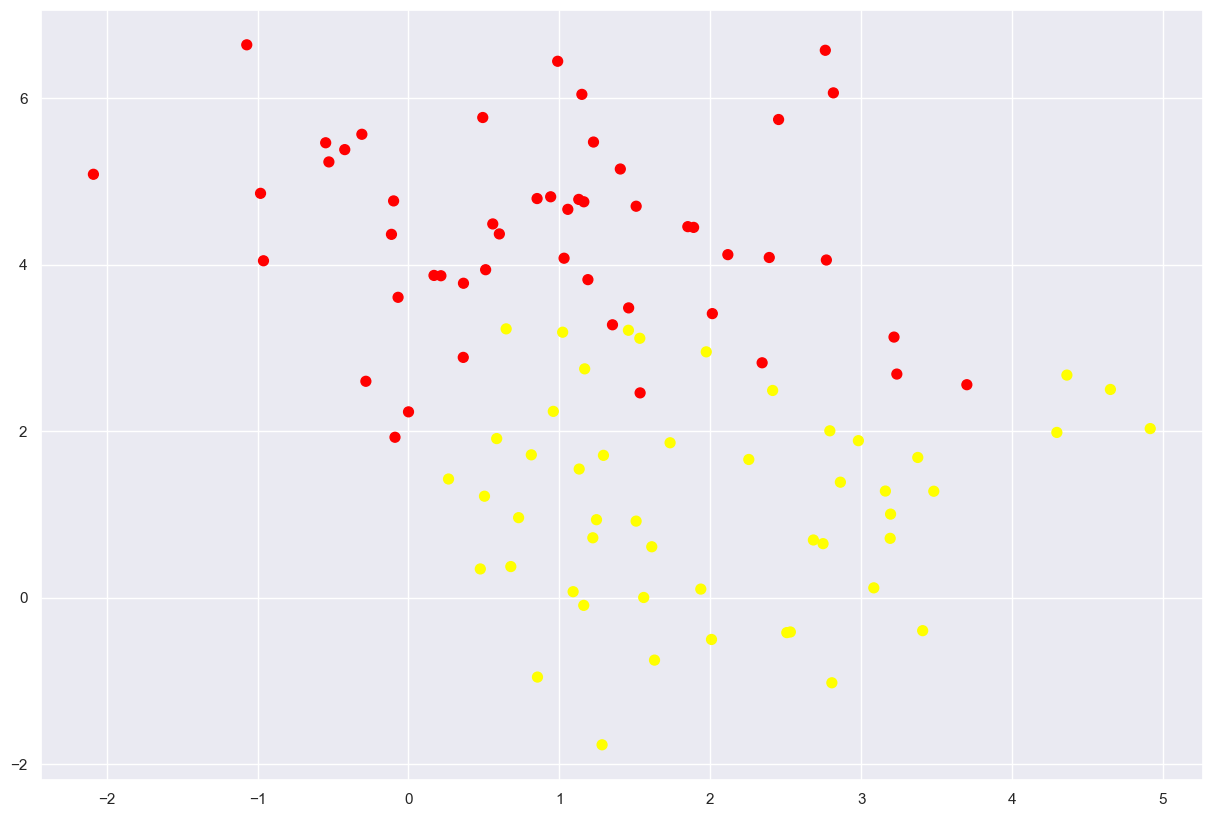

In [26]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

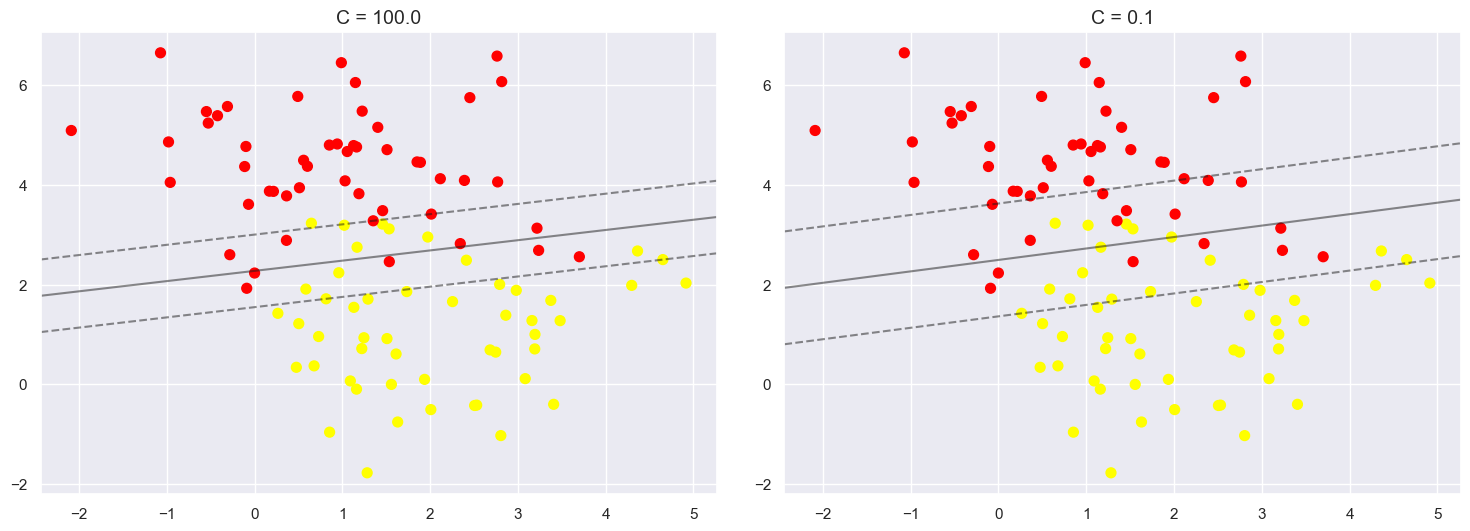

In [27]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [100.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [28]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

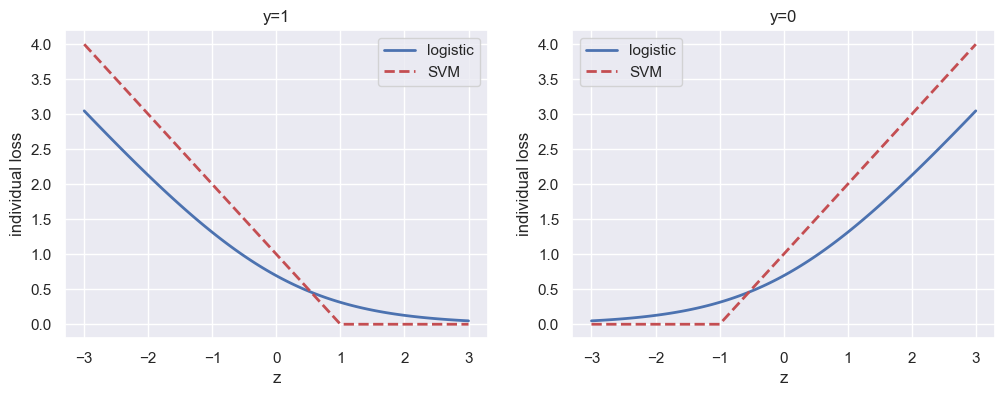

In [29]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
z = np.linspace(-3,3,num=100)
ax[0].plot(z,-np.log(sigmoid(z)),label='logistic',lw=2, color='b')
ax[1].plot(z,-np.log(1-sigmoid(z)),label='logistic',lw=2,color='b')
ax[0].plot(z,np.maximum(0,1-z),label='SVM',lw=2, color='r',linestyle='--')
ax[1].plot(z,np.maximum(0,1+z),label='SVM',lw=2,color='r',linestyle='--')
ax[0].set_title('y=1')
ax[1].set_title('y=0')
ax[0].set_xlabel('z')
ax[1].set_xlabel('z')
ax[0].set_ylabel('individual loss')
ax[1].set_ylabel('individual loss')
ax[0].legend()
ax[1].legend()
plt.show()